In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

In [2]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 1  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(1, SAMPLE_RATE, DURATION)
_, carrierFreq = generate_sine_wave(1, SAMPLE_RATE, DURATION)
_, midFreq = generate_sine_wave(3, SAMPLE_RATE, DURATION)
_, subFreq = generate_sine_wave(5, SAMPLE_RATE, DURATION)
midFreq = midFreq * 0.333
subFreq = subFreq * 0.2

mixed_tone = carrierFreq + midFreq + subFreq
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

In [3]:
pmName = input('Enter module name:')
Style = __import__(pmName)
print(Style)

Enter module name: Classical


<module 'Classical' from '/home/marco/Videos/FourierTheTransformer/Classical.py'>


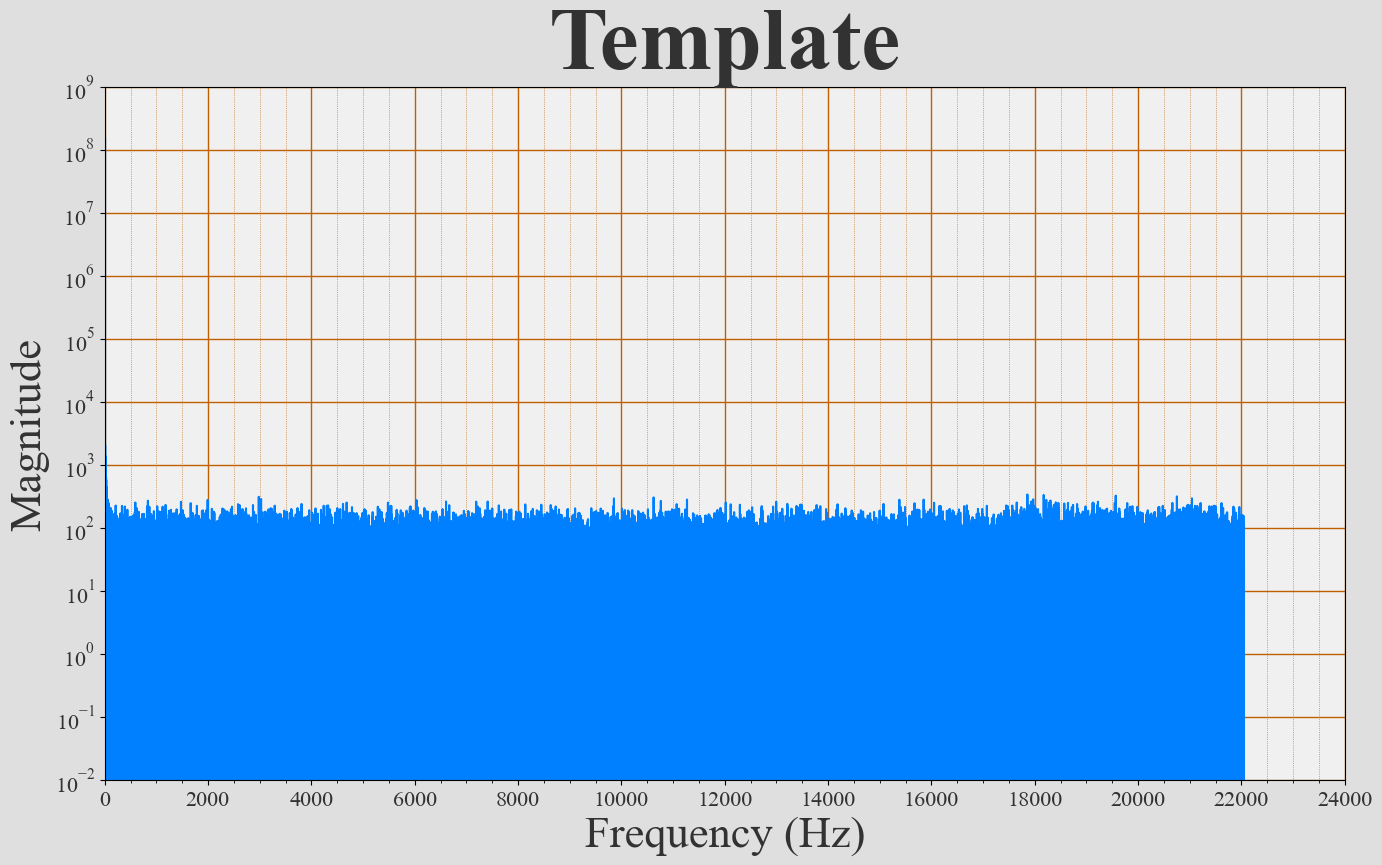

In [4]:
plt.figure(figsize=Style.dimension, facecolor=Style.mbColor, num=1, clear=True)
plt.axes().set_facecolor(Style.gbColor)
plt.ylim(0.01, Style.ylim)
plt.title("Template", fontsize=64, **Style.font, weight='bold', color=Style.fontColor)
plt.xlabel('Frequency (Hz)', fontsize=32, **Style.font, color=Style.fontColor)
plt.ylabel('Magnitude', fontsize=32, **Style.font, color=Style.fontColor)
#plt.plot(xf, np.abs(yf))#For normal view
plt.semilogy(xf, abs(yf), color=Style.lineColor)#For log view
plt.margins(x=0)
plt.xticks(np.arange(25000, step=2000), fontsize=16, **Style.font, color=Style.fontColor)
plt.yticks(np.logspace(-2,9,num=9+2+1, base=10,dtype='float'), fontsize=16, **Style.font, color=Style.fontColor)
plt.grid(which='major', color=Style.majorGridColor, linewidth=1)
plt.grid(which='minor', color=Style.minorGridColor, linestyle=":", linewidth=0.5)
plt.minorticks_on()
plt.savefig("Template.png")